Question 1: How to get the last row
Your answer: df.iloc[-1]
Time taken for this answer: 12.19 seconds
Correct!
Question 2: Find the largest 5 values in a df column
Your answer: df.nlargest(5,'A')
Time taken for this answer: 17.77 seconds
Correct!
Question 3: If you want to determine the specific weekday of each date in the index of a DataFrame df, which attribute would you access?
Your answer: df.index.weekday
Time taken for this answer: 28.90 seconds
Sorry, the correct answer is: df.index.dayofweek
Your answer: df.index.dayofweek
Time taken for this answer: 6.49 seconds
Correct!
Question 4: Reverse the rows of a dataframe  using loc
Your answer: df.loc[::-1,:]
Time taken for this answer: 17.25 seconds
Sorry, the correct answer is: df.loc[::-1]
Your answer: df.loc[::-1]
Time taken for this answer: 11.54 seconds
Correct!
Question 5: Create a histogram using sns of a df column A
Your answer: sns.displot(data=df,x='A',kind='histplot')
Time taken for this answer: 27.54 seconds
Correct!
Qu

C:\Users\asus\AppData\Local\Temp\ipykernel_13712\2077339436.py:105: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  updated_data = existing_data.append(new_data, ignore_index=True)


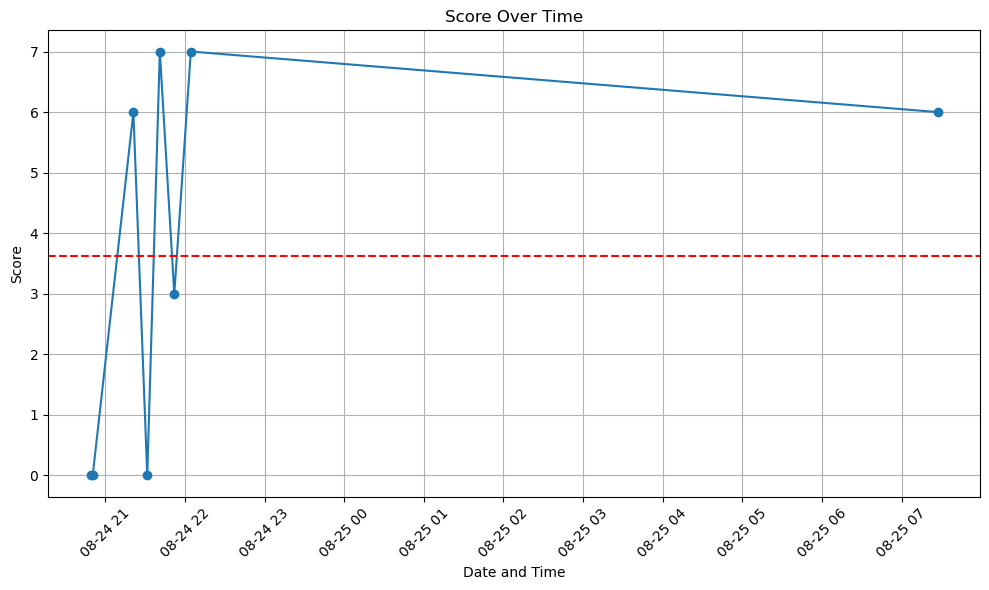

In [1]:
import pandas as pd
import time
import numpy as np

# Load the Excel file
file_path = "data.xlsx"  # Change this to the path of your Excel file
questions_df = pd.read_excel(file_path)
questions_df = questions_df.sample(frac=1)

# Initialize the score
score = 0

# List to keep track of asked questions
asked_questions = []

def quiz_game():
    global score,asked_questions
    # Initialize the score
    score = 0

    # List to keep track of asked questions
    asked_questions = []

    # Function to get a random question that hasn't been asked before
    def get_random_question():
        available_questions = questions_df[~questions_df["Questions"].isin(asked_questions)]
        if available_questions.empty:
            return None
        return available_questions.sample().iloc[0]

    # Record the start time of the quiz
    quiz_start_time = time.time()

    # Ask 10 questions
    quit_flag = False  # Add this flag

    for i in range(10):
        if quit_flag:  # check the flag at the start of each iteration
            break

        question = get_random_question()

        if question is None:
            print("No more available questions.")
            break
        

        print(f"Question {i + 1}: {question['Questions']}")
        asked_questions.append(question["Questions"])  # Add the question to the list of asked questions
        a=0
        while True:
            start_time = time.time()  # Start timer
            user_answer = input("Your answer: ")
            end_time = time.time()  # End timer
            time_taken = end_time - start_time  # Calculate time taken in seconds
            print(f"Time taken for this answer: {time_taken:.2f} seconds")

            correct_answer = question["Answer"]

            # Check if user wants to quit or retry
            if user_answer.strip().lower() == "quit":
                print(f"\nYou chose to quit! Your current score is: {score} out of {i+1} questions asked.")
                quit_flag = True  # Set the flag to True
                break  # This will break out of the inner while loop
            elif user_answer.strip().lower() == "r":
                break  # Break out of the inner loop to get a new question
            
            if user_answer.strip() == correct_answer.strip():
                print("Correct!")
                if a ==0:
                    score += 1                
                    break
                break
            else:
                print(f"Sorry, the correct answer is: {correct_answer}")
                a =1
                

    # Record the end time of the quiz
    quiz_end_time = time.time()

    # Calculate total time taken for the quiz
    total_time_taken = quiz_end_time - quiz_start_time

    print(f"\nGame Over! Your final score is: {score} out of 10.")
    print(f"Total time taken for the quiz: {total_time_taken:.2f} seconds.")



    from datetime import datetime

    def append_score_to_excel(score):
        # Create a new DataFrame with the current date and time and your score
        now = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
        new_data = pd.DataFrame({"Date and Time": [now], "Score": [score]})

        # Check if the Excel file already exists
        file_name = "scores.xlsx"
        try:
            existing_data = pd.read_excel(file_name)
        except FileNotFoundError:
            existing_data = pd.DataFrame(columns=["Date and Time", "Score"])

        # Append the new row to the existing data
        updated_data = existing_data.append(new_data, ignore_index=True)

        # Save the updated data back to the Excel file
        updated_data.to_excel(file_name, index=False)

    # To use the function
    append_score_to_excel(score)
    
    
    import matplotlib.pyplot as plt

    def plot_scores_from_excel():
        # Read the Excel sheet into a DataFrame
        file_name = "scores.xlsx"
        df = pd.read_excel(file_name)

        # Convert the "Date and Time" column to a datetime format
        df['Date and Time'] = pd.to_datetime(df['Date and Time'])
        
        # Calculate the average score
        avg_score = df['Score'].mean()

        # Plot the scores
        plt.figure(figsize=(10, 6))
        plt.plot(df['Date and Time'], df['Score'], marker='o', linestyle='-')
        plt.axhline(y=avg_score, color='red', linestyle='--', label=f'Average Score: {avg_score:.2f}')
        plt.xlabel('Date and Time')
        plt.ylabel('Score')
        plt.title('Score Over Time')
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    # After appending the score to the Excel sheet, call the function to display the plot
    plot_scores_from_excel()


# Run the quiz game
quiz_game()
